# 速習 napari ―基礎知識と書き方

黄承宇

Cheng-Yu Huang

Department of Physiology, Development and Neuroscience, University of Cambridge

## サマリー (328字)

近年、生物画像解析の分野は急速に進歩しており、多次元データに対応した画像可視化ツールの需要が高まっている。Napariは、多次元データに対応し新しく開発された画像可視化ツールであり、画像（Image）、点群（Point）、ラベル（Label）、形（Shape）、トラック（Track）などのデータを表示することができる。また、NapariはPython上に構築されたオープンソースソフトウェアであり、使いやすくカスタマイズ可能で、多くの科学的ライブラリが利用可能なPythonエコシステムの利点を活かしている。このチュートリアルでは、Napariを動かすPython環境をcondaを通じてセットアップする方法から始め、PythonコーディングのインターフェースであるJupyterノートブックを紹介し、データサイエンスでよく使われるパッケージを紹介しながら、Napariの基本知識と使い方を手を動かしながら学んでいく。

## はじめの一歩

### Python環境のセットアップ

#### Anaconda/Minicondaのインストール

Pythonパッケージ管理ツールであるconda(https://docs.anaconda.com/)を使用してPython環境を設定する。condaにはAnacondaとMinicondaの二つのバージョンがあり、どちらも本章および後の章で必要なPython環境を提供する。違いとして、Anacondaにはパッケージ管理のためのGUI（グラフィカルユーザーインターフェース）が付属しているが、Minicondaにはない。Minicondaでは（Anacondaでも可能だが）コマンドラインでパッケージを管理する。Anacondaにはプログラミング初心者向けの追加機能が多く含まれているため、AnacondaはMinicondaより多くのストレージを必要とする（約4.4 GB対約480 MB）。詳細についてはこちら(https://docs.anaconda.com/distro-or-miniconda/)を参照されたい。本チュートリアルでは、すべてをコマンドラインで行うため、Minicondaで十分である。ダウンロードリンクはこちら(https://docs.anaconda.com/miniconda/#miniconda-latest-installer-links)である。

#### Minicondaで仮想環境(venv)を作成する

次に、condaを使って仮想環境（virtual environment, venv）を作成する。venvは、異なるプロジェクトごとに必要なパッケージを分けて管理するためのツールである。これにより、各プロジェクトに独立したワークベンチを作成し、プロジェクトごとの依存関係を管理することができる。多くの場合、異なるプロジェクトには異なるパッケージが必要であるため、プロジェクト間のパッケージコンフリクトを防ぎ、パッケージをプロジェクト単位で管理するためにvenvを使用する。さらに、Python環境が破損した場合でも、環境を削除して再作成することが可能である。

では、コマンドラインを使用して環境を作成する。Python環境のインストールに関する詳細なチュートリアルはこちら(https://conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html)で見つけることができる。まず、エクスプローラーで*anaconda prompt (miniconda3)*を見つけてクリックする。

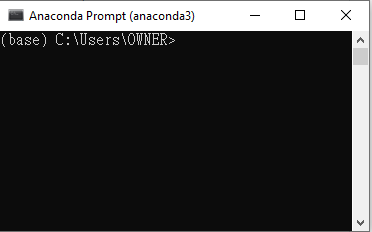

`(Base)` は、ベース、デフォルトの環境にいることを意味している。次に、`napari-env` という名前の環境を作成する。環境を作成するには、次のコマンドを実行する：

```bash
conda create -y -n napari-env -c conda-forge python=3.11
```

ここでは、Python 3.11 の環境を作成する。condaが続行するかどうか尋ねる場合は、`y` を入力する：

```bash
proceed ([y]/n)?
```
インストールが完了したら、`done` と表示される（A）。次に、環境を `conda activate` コマンドでアクセスする（B）：

```bash
conda activate napari-env
```

コマンドラインの始まりが`(base)`から`(napari-env)`に変わる（C）。これは、`napari-env`の仮想環境に入ったことを意味する。

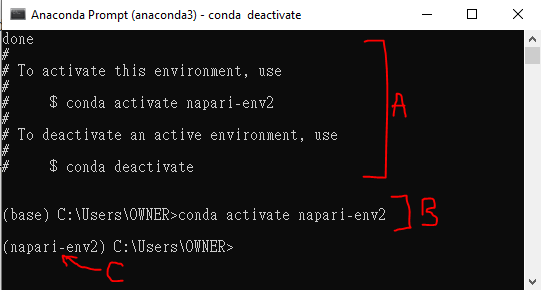

#### napariとJupyterノートブックおよびその他の便利なパッケージのインストール

`napari-env`に入ったら、まずnapariをインストールする：

```bash
python -m pip install "napari[all]"
```

次に、他の画像解析や画像処理に頻繁に使われるパッケージをインストールする。これには、コーディングやnapariとのインターフェースに使用するjupyter、画像処理やマトリックス計算を含む数値演算のためのnumpy、作図のためのmatplotlib、科学計算のためのscipy、画像処理に使われる多くのアルゴリズムを含むscikit-image、及び表形式データの操作のためのpandasが含まれている。これらのパッケージをインストールするには、次のコマンドを実行する：

```bash
pip3 install numpy matplotlib scipy scikit-image jupyter pandas 
```
`proceed ([y]/n)?` と表示されたら、`y` を入力する。

以上で環境インストール手順は終了である。

#### 次回napari-env環境に戻る方法

コマンドウィンドウを閉じて、再度前回作成した環境に戻りたい場合がある。しかし、コマンドプロンプトを再起動するたびに、常に`(base)`環境に戻ってしまう。`(napari-env)`環境に戻るには、次のコマンドを入力し、エンターキーを押す：

```bash
conda activate napari-env
```

環境名を異なる名前にした場合や、作成した仮想環境の一覧を確認したい場合は、次のコマンドを入力してエンターキーを押す：

```bash
conda env list
```

現在の環境には`*`が表示される。

他にも多くのcondaコマンドがあり、仮想環境の情報表示や削除などに使用できる。詳細については、こちら(https://docs.conda.io/projects/conda/en/4.6.0/user-guide/tasks/manage-environments.html)のウェブサイトを参照してほしい。

## Napariを起動する
このセクションでは、Napariの基本的な使い方を紹介する。
### 方法１ - コマンドラインから起動する
Napariを起動する方法はいくつかある。一つ目の方法はコマンドラインで`napari`と入力してエンターキーを押すことである。次のコマンドを入力してエンターキーを押す：
```bash
napari
```
これにより、下の図のようにNapariビューアーが開く。画像を読み込むには、トップバーのFileメニューをクリックし、Open File(s)を選択する。画像を選択し、Openをクリックすると、画像が表示される。また、別の方法として、画像を直接ドラッグアンドドロップすることも可能である。

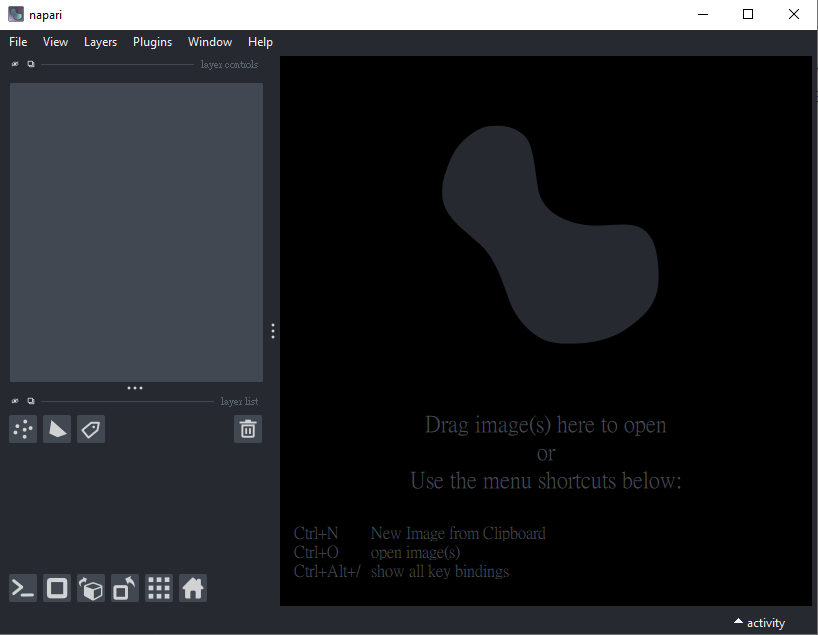

### 方法２ - JupyterノートブックからPythonスクリプトで起動する
NapariはPythonスクリプトからも起動できる。PythonのIDE（統合開発環境）であるJupyterノートブックを使用して、Napariを起動する方法について説明する。Jupyterでは、コードとその結果を同じ場所に表示することができるため、データの可視化に適している。また、コードとドキュメンテーションの両方を含むノートブックを作成することができるため、コードの再利用性が高まり、他の人との共有や科学文献のコードシェアリングにも便利である。

このセクションでは、まずJupyterノートブックの基本的な使い方を紹介する。このツールは後の章でも使用するため、役立つであろう。最後に、Napariから画像を呼び出す方法の例を示す。

#### Jupyterノートブックを起動する
Jupyter Lab内でJupyter Notebookを実行する。Jupyter Labを起動するには、次のコマンドを実行する：
```bash
jupyter lab
```
次のようなページが表示される。

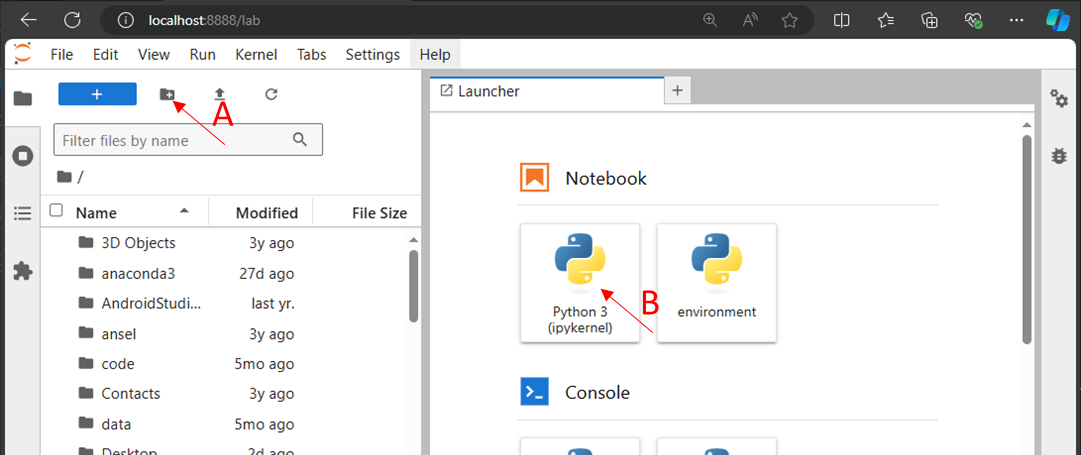

次に、この章で作成するスクリプトを保存するフォルダを作成する。まず、Aをクリックして新しいフォルダを作成し、フォルダ名を napari-tutorial とする。フォルダをクリックして開く。次に、Bをクリックして新しいJupyterノートブックを作成する。作成された新しい .ipynb ファイルを右クリックして、名前を getting_started.ipynb に変更する。これで、Jupyter Labのウィンドウは次のようになる。

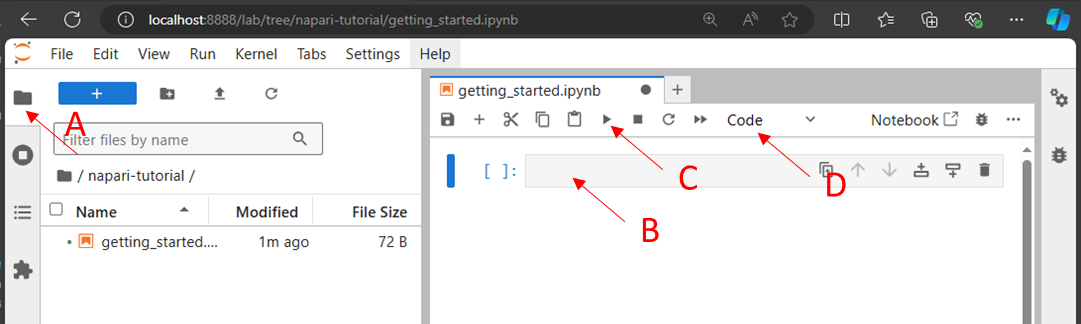

次に、Aをクリックして左のパネルを閉じ、Bでコーディングを始める。

#### JupyterでのHello World

前の章で、いくつかの簡単なPythonプログラミングの構文について学んだ。ここでは、それをJupyterで試してみる。

Bに次のコードを入力する：
```python
print("Hello World!")
```
そして、Cをクリックするか、ショートカット `Ctrl + Enter` を押すと、コードが実行され、期待通り次のように表示される：

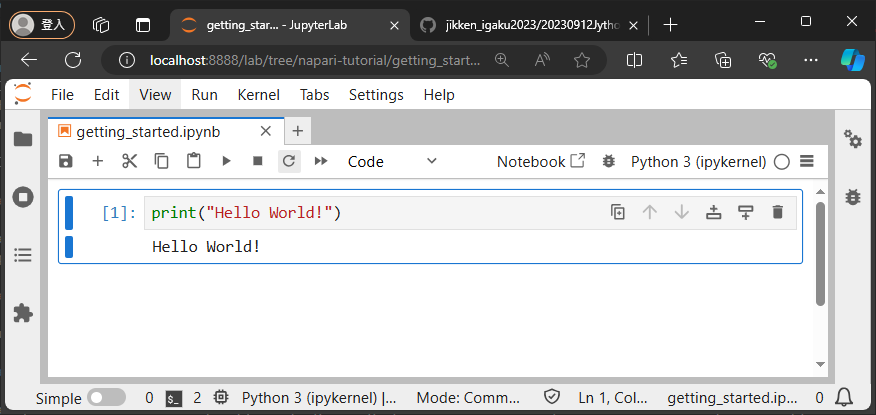


Jupyterノートブックでは、コードはブロックに分割されており、それぞれのブロックを「セル」と呼ぶ。さらにコードの「セル」を追加するには、現在のセルを選択して上部バーの + 記号 (D) をクリックするか、ショートカットキー `b` を押す。もし `a` を押すと、新しいセルが現在のセルの上に作成される。

####  Jupyterでのドキュメンテーション作成

前述のように、Jupyterノートブックの利点の一つは、ドキュメントとコードを一つのファイルにまとめることができる点である。先ほどは、Pythonのコードを入力するためのコードセルの作成方法を紹介した。ここでは、Jupyterで「マークダウン（Markdown）」セルを作成する方法を説明する。

Markdownは、テキストを簡単にフォーマット・作成できる軽量マークアップ言語である。Markdownを使うことで、見出し、リスト、リンク、画像、表などを簡単な構文で追加できる。ドキュメント、ウェブページ、Jupyterノートブックなどで広く使われている。

マークダウンセルを作成するには、はじめに一つのセルを選択それか作成し、上部バーのドロップダウンメニュー(E)をクリックし、「Markdown」を選択する。これで、そのセルにドキュメントを記述できる。ショートカットを使う場合は、`m` を押してそのセルをマークダウンに変更する（コードセルに戻すには `y` を押す）。

ノートブックにタイトルをつけてみよう。新しいセルを今のセルの上に作り(ショートカット`a`)、マークダウンセルに変え(ショートカット`m`)、次の内容を入力する：
```markdown
# JupyterでNapariを起動する
Jupyterノートブックから*Napari*を起動する方法を説明する。
## Hello World
次のセルでは **「Hello World!」** を表示する。
```
実行ボタンをクリックするか、`Ctrl + Enter` を押す。次のように表示される：

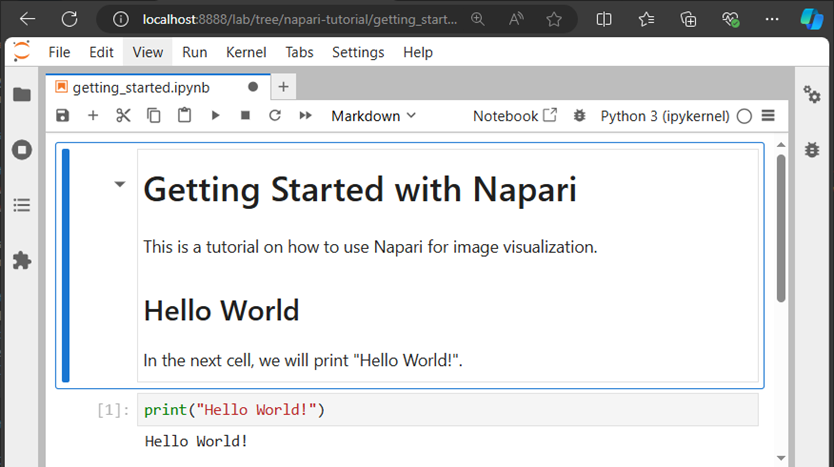

ご覧の通り、テキストはタイトル（#）、サブタイトル（##）としてフォーマットされている。さらに、* でテキストを囲むことで斜体、** で囲むことで太字にすることができる。これ以外にも、### を使用してサブサブタイトルを作成することができる。また、* を使って箇条書きリストを、1. を使って番号付きリストを、--- を使って水平線を作成することができる。Markdownの構文について詳しくは、このチートシート(https://www.markdownguide.org/cheat-sheet/)を参照してほしい。

ここまで、いくつかのJupyterノートブックでのショートカットを学んできた。さらにショートカットを知りたい場合は、上部バーの[Help　> Show Keyboard Shortcuts]を参照すること。すべてのショートカットを覚える必要はないが、その存在を知っておくと便利である。Jupyterノートブックを頻繁に使うようになると、自然に身についてくるだろう。

---

演習　Hello Worldのセルの下に新しいマークダウンセルを作成し、セルに「Napariでの画像表示」というサブタイトルを書いてみよう。

---


In [ ]:
i = 0

In [ ]:
i = i + 1

In [ ]:
print(i)

#### JupyterでNapariを起動する


次に、JupyterノートブックからNapariを起動する。まず、skimage.data モジュールからサンプル画像を読み込む。新しいセルを作成し、次のコードを入力する:

In [1]:
# skimageから3D画像を読み込む
from skimage.data import cells3d

# 画像のサイズを取得
shape = cells3d().shape
print(f'画像のサイズ: {shape}')

画像のサイズ: (60, 2, 256, 256)


次の出力が表示される：

`画像のサイズ: (60, 2, 256, 256)`

この出力から、画像が4次元の配列であることがわかる。最初の次元（dim 0）は60で、これはスタック内に60枚の画像があることを意味する。第2の次元は2で、各画像に2つのチャンネルがあることを示している。第3および第4の次元は256で、各画像のサイズが256x256ピクセルであることを示している。

このままNapariで画像を表示することもできるが、画像を個々のチャンネルに分けて別々に表示する方が便利である。次のセルに次のコードを入力する:

In [2]:
# 画像を個々のチャンネルに分離
cell3d_ch0 = cells3d()[:, 0, :, :]
cell3d_ch1 = cells3d()[:, 1, :, :]

# 画像のサイズを取得
shape = cell3d_ch0.shape
print(f'画像のサイズ: {shape}')

画像のサイズ: (60, 256, 256)


次に、Napariを起動し、二つのチャンネルに分けた画像をNapariに追加してみる。次のセルに下のコードを入力してみよう。

In [3]:
# napariをインポート
import napari

# napariのビューアを作成
viewer = napari.Viewer()

# 画像を追加
channel_0_img = viewer.add_image(cell3d_ch0, colormap='green', name='channel 0')
channel_1_img= viewer.add_image(cell3d_ch1, colormap='blue', name='channel 1')

Napariのビューアが表示される。`channel 0` と `channel 1` の透明度（Opacity）、コントラスト（Contrast Limit）、およびガンマ（Gamma）を調整して、画像を確認してみよう。また、画像の拡大・縮小にはマウスのホイールを使用してみると良い。

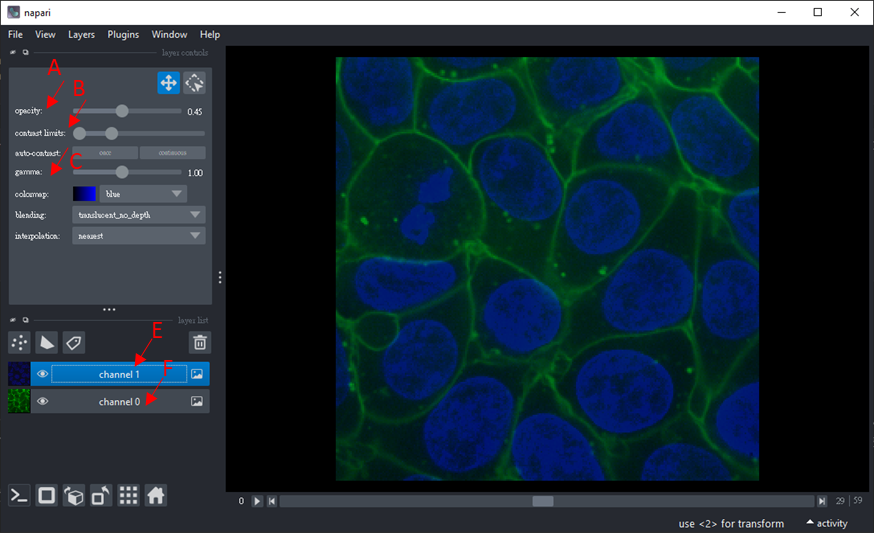

これで、Napariビューアのキャンバス（Canvas）、レイヤーリスト（Layer List）、レイヤーコントロール（Layer Control）の各機能を探索したことになる。上の図では、ビューアの各エリアに対応する名前がラベル付けされている。ウィンドウの各部分に関する詳細は、こちら(https://napari.org/stable/tutorials/fundamentals/viewer.html#layout-of-the-viewer)で確認できる。

コードをもう一度確認してほしい。Napariのビューアがオブジェクト指向プログラミングの概念を利用していることに注意する必要がある（前の章を参照）。そのため、画像や画像関連のデータは**レイヤー**として作成されたビューアオブジェクトに追加される。ここでは、viewer.add_image() メソッドを使って画像レイヤーを追加した。次のセクションでは、他のレイヤーの追加方法についても説明する。


顕微鏡の設計と光学的のリミットにより、3D画像のほとんどは異方性(anisotropic)であり、x、y、zの各軸のピクセルサイズが異なることが多い。この画像もその一例だ。skimage.data.cell3dのドキュメンテーション(https://scikit-image.org/docs/stable/api/skimage.data.html#skimage.data.cells3d)を確認すると、z、y、x軸のピクセルサイズ（それぞれ0.29、0.26、0.26 µm）がわかる。これらのサイズを視覚化するため、z、y、x軸のスケーリングを下のコードで行う。

In [4]:
viewer.layers['channel 0'].scale = [0.29, 0.26, 0.26]
viewer.layers['channel 1'].scale = [0.29, 0.26, 0.26]

---

演習: Viewerのスライダーやボタンをそれぞれクリックして、その機能を試してみよう。次に、画像を三次元モードで表示し、下の図のように画像を回転させてみること。

![image.png](attachment:image.png)

---

作業が完了したら、以下のコマンドを実行してNapariビューアを閉じる。

In [5]:
# Napariビューアを閉じる
viewer.close()

### ついでに: matplotlib での画像表示

次のセクションに進む前に、matplotlibを使った画像の表示方法をカバーしたい。matplotlibはPythonの作図用パッケージで、データの可視化に広く使用されている。プロット、ヒストグラム、パワースペクトル、棒グラフ、エラーチャート、散布図などを作成することができる。Napariが開発される前は、matplotlibが画像の可視化に最も人気のあるライブラリの一つであり、現在でも他のアプリケーションで広く使用されている。ここでは、matplotlibを使って画像を表示する方法を紹介する。

前のセルの下に新しいセルを作成し、次のコードを入力しよう（何をしているのか説明するために、マークダウンセルを追加してもよいだろう):

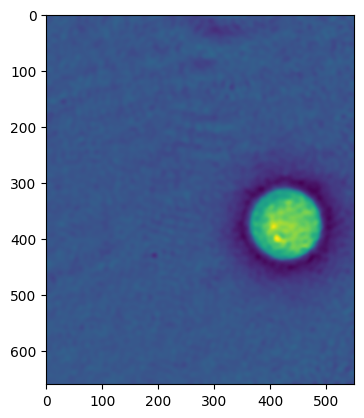

In [6]:
# skimageからcell画像を読み込む
from skimage.data import cell

# matplotlib.pyplotをpltとしてインポート
from matplotlib import pyplot as plt

# cell画像を表示
plt.imshow(cell())

# 画像のタイトルを設定
plt.title('cell')

以前使用した二つのチャンネルの画像を、matplotlib.pyplot.imshow を使って表示することもでる。

Text(0.5, 1.0, 'Channel 1')

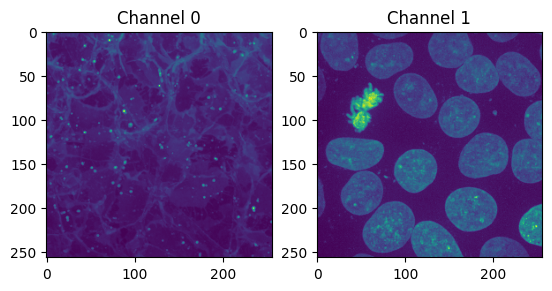

In [7]:
# 2Dに圧縮するためには、最大値投影（max intensity projection）を用いする。これは、3Dデータの各スライスに対して、
# 指定した軸方向の最大値を取ることで、2D画像に圧縮する方法。
import numpy as np

cell2d_ch0 = np.max(cell3d_ch0, axis=0)
cell2d_ch1 = np.max(cell3d_ch1, axis=0)

# 画像の表示
plt.subplot(1, 2, 1)
plt.imshow(cell2d_ch0)
plt.title('Channel 0')
plt.subplot(1, 2, 2)
plt.imshow(cell2d_ch1)
plt.title('Channel 1')

Napariが登場する前は、Matplotlibが画像可視化の最も人気のあるライブラリであった。しかし、Matplotlibでは3D可視化が不可能であり、また、複数の画像を重ねて表示することも難しい。この点が、Napariの画像可視化における優位性を際立たせている。だが、2D画像の可視化や作図などではMatplotlibは今でも主流ですので言及しておきたい。

次のセクションでは、Napariのもう一つの大きな利点として、Napariビューアにさまざまなタイプのデータを追加する方法について学ぶ。

## Napari Layer(レイヤー)の紹介

次に、Napariビューアのレイヤー機能を探っていく。先述の通り、Napariビューアはオブジェクト指向ビューアであり、データはレイヤーとしてビューアに追加される。前のセクションでは、viewer.add_image()メソッドを使用して画像レイヤーをビューアに追加した。このセクションでは、ラベル、ポイント、トラック、シェイプなど、他のさまざまなタイプのレイヤーをビューアに追加する方法について詳しく見ていく。

### ラベルレイヤー(Labels Layer)を追加する

Labels are used to annotate images. They are often used in segmentation tasks to label different regions of an image. In napari, labels are added to the viewer as layers using the `viewer.add_labels()` method. Labels are represented as an integer array, where each integer represents a different region of the image. In the following example, we will threshold the image from the last section and add the resulting labels to the viewer.

ラベルは画像に含まれたピクセルを注記するために使用される。ラベルは整数配列として表現され、各整数が画像の異なる領域を表す。例えば、あるグループのピクセルがみんな同じ細胞核を表していたら、そのピクセルたちは同じ数字にラベリングされる。画像をラベルする過程をセグメンテーション(Segmentation)と呼ぶ。Napariでは、ラベルは`viewer.add_labels()`メソッドを使ってレイヤーとしてビューアに追加される。次の例では、前のセクションの画像を閾値処理(Thresholding)でセグメンテーションして、得られたラベルをビューアに追加する。ワークフローは図１１のようになる。では、コーディングをはじめよう。次のセルに、下のコードを入力しよう。

In [8]:
# napariをインポート
import napari

# napariのビューアを作成
viewer = napari.Viewer()

# 画像を追加 (2D画像を使用する。)
image_layer = viewer.add_image(cell2d_ch0, colormap='green', name='channel 0')
image_layer = viewer.add_image(cell2d_ch1, colormap='blue', name='channel 1')

まず、画像をぼかし、次に閾値処理を行って二値画像を作成する。次に、この二値画像にラベルを付け、viewer.add_labelsを使用してビューアに追加する。以下のコードを新しいセルに入力しよう。

In [9]:
# cell2d_ch1画像に対してガウスぼかしを実行する
from skimage.filters import gaussian

# ガウスフィルターを適用
cell2d_ch1_blurred = gaussian(cell2d_ch1, sigma=1)

# ぼかした画像を表示
image_layer = viewer.add_image(cell2d_ch1_blurred, colormap='blue', name='channel 1 blurred')

# cell2d_ch1画像に対して大津閾値処理を実行する
from skimage.filters import threshold_otsu

# 大津閾値処理を適用
thresh = threshold_otsu(cell2d_ch1_blurred)
cell2d_ch1_thresholded = cell2d_ch1_blurred > thresh

# 閾値処理した画像を表示
image_layer = viewer.add_image(cell2d_ch1_thresholded, colormap='blue', name='channel 1 thresholded')


---

演習: `cell2d_ch1_thresholded` には、多くの細胞中の穴やデブリがセグメントされている。この画像を使って、次のセルにモルフォロジー操作（ここでは、穴埋めと開操作）を適用して細胞の形を整え、その後、ラベルを作成して `viewer.add_labels()` でNapariビューアに追加しよう。

ヒント: `skimage.morphology`モジュールの `binary_fill_holes()` と `binary_opening()` メソッドを使用する。ラベリングは、`skimage.measure`モジュールの `label()` メソッドを使用すること。

---

In [10]:
# cell2d_ch1_thresholded 画像に対して穴埋め操作を行う
from scipy.ndimage import binary_fill_holes

# 穴埋め関数を適用する
cell2d_ch1_filled = binary_fill_holes(cell2d_ch1_thresholded)

# 穴埋め後の画像を表示する
image_layer = viewer.add_image(cell2d_ch1_filled, colormap='blue', name='channel 1 filled')

# cell2d_ch1_filled 画像に対して開操作を行う
from skimage.morphology import opening, disk

# 開操作を適用する
cell2d_ch1_opened = opening(cell2d_ch1_filled, disk(5))

# 開操作後の画像を表示する
image_layer = viewer.add_image(cell2d_ch1_opened, colormap='blue', name='channel 1 opened')

# cell2d_ch1_opened 画像に対して連結成分解析を行う
from skimage.measure import label

# 連結成分解析を適用する
cell2d_ch1_labeled = label(cell2d_ch1_opened)

# ラベルを表示する
label_layer = viewer.add_labels(cell2d_ch1_labeled, name='channel 1 labeled')


下のような画像が表示される。ラベルは異なる色で表示され、異なる領域を区別している。ラベルの透明度とコントラストを調整して、画像を見てみよう。Napariでは、レイヤーのプロパティによって、異なるコントロールツールが表示される。ラベルの場合、Eraser、Fillなどのツールが表示される。これらのツールを使って、ラベルを編集することができる。

---

演習: ラベルを注意深く見ると、一部のラベルが正しくないことに気づくかもしれない。レイヤーコントロールツールを使って、各細胞が異なるラベル（色）を持つようにラベルを編集してみよう。また、以下に示すようにラベルを表示する方法を探してみてほしい。

*ヒント 1: こちらのサイト（https://napari.org/stable/howtos/layers/labels.html#editing-using-the-tools-in-the-gui) を参照すると良いでしょう。
** ヒント 2: contour の数値を変更してみてください。


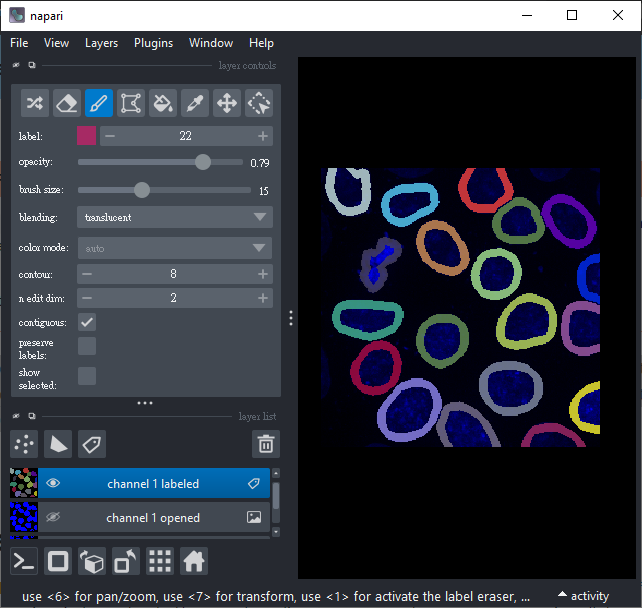

---

#### ラベルを保存する

手動でラベルを編集した後、後での分析のためにラベルを保存したい場合、次のコードを実行して、Napariビューアからノートブックにラベル変数を取り戻すことができる。

Unique labels before relabelling: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
Unique labels after relabelling: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


C:\Users\OWNER\AppData\Local\Temp\ipykernel_25928\1570274169.py:25: UserWarning: cell2d_ch1_relabel.tif is a low contrast image
  imsave('cell2d_ch1_relabel.tif', cell2d_ch1_relabel)


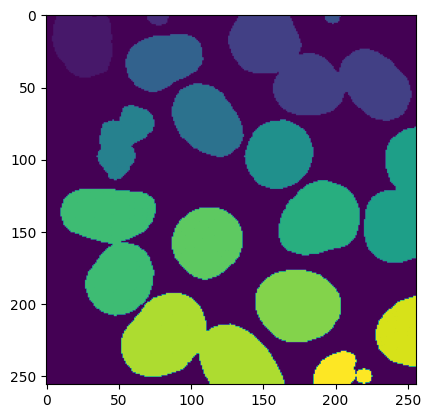

In [11]:
# ラベルレイヤーからラベルを保存する
labeled_image = label_layer.data

# Napariビューアを閉じる
viewer.close()

# ユニークなラベルを表示する
unique_labels = np.unique(labeled_image)
print(f'リラベリング前のユニークなラベル: {unique_labels}')

# いくつかのラベルを削除したので、画像を再ラベリングする必要があります
from skimage.measure import label

# 画像を再ラベリングする
cell2d_ch1_relabel = label(labeled_image)
unique_labels = np.unique(cell2d_ch1_relabel)
print(f'リラベリング後のユニークなラベル: {unique_labels}')

# 再ラベリングされた画像をmatplotlibで表示する
plt.imshow(cell2d_ch1_relabel)
plt.colorbar()
plt.title('Channel 1 Relabeled')

# 再ラベリングされた画像を保存する
from skimage.io import imsave

imsave('cell2d_ch1_relabel.tif', cell2d_ch1_relabel)

前のコードセルでは、`label_layer = viewer.add_labels(...` を使ってラベルを表示しましたので、ここでは `label_layer.data` を使ってラベルをビューアオブジェクトから取得した。手動でラベリングを行う過程でラベルを削除したり、新しいIDでラベルを追加したため、「リラベリング前のユニークなラベル」の番号が連続していないことがわかる。理想的には、ラベル番号が 1, 2, 3 ... n で、nがラベルの数(ここでは細胞核の数)となるべきだ。これを実現するために、`skimage.measure` の `label` 関数を使用してラベル番号を再割り当てした。最後に、`plt.imshow` でラベル画像を表示し、`skimage.io.imsave` で画像を保存した。保存時に `UserWarning: cell2d_ch1_relabel.tif is a low contrast image` という警告が表示されることがあるが、これはラベル画像のグレースケールが通常の画像に比べて非常に少ないためである。警告を無視したい場合は、関数に `check_contrast=False` を追加して無効にすることができる。


#### Regionpropsの紹介

次に進む前に、skimage.measure.regionprops_table（または単に regionprops）について触れておきたい。この関数は、ラベルによって画像のプロパティを測定するのに役立つ。以下に画像特徴抽出の例コードを示す。regionprops と regionprops_table の詳細や測定可能な項目については、ドキュメンテーション(https://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.regionprops)を確認してほしい。

regionprops 以外に、ここではもう一つのライブラリである pandas も使用した。Pandas はテーブルデータの処理に広く使用されるライブラリであり、データサイエンティストにとって学ぶべき最も重要なライブラリの一つである。Pandas は、コードの出力で示されるように、テーブルデータの可視化や、テーブル内のデータを簡単かつ迅速に修正するのにも役立つ。詳細については、Pandasのドキュメンテーションやネット上のチュートリアルを確認することをお勧めする。

In [12]:
# ラベル付き画像からプロパティを抽出するためにregionpropsを使用する
from skimage.measure import regionprops_table

# 抽出したいプロパティを定義する
properties = ['label', 'area', 'centroid', 'max_intensity', 'mean_intensity', 'min_intensity']

# プロパティを抽出する
props = regionprops_table(cell2d_ch1_relabel, cell2d_ch1, properties=properties)

# DataFrameを作成するためにpandasをインポートする
import pandas as pd

# props 辞書から DataFrame を作成する
props_df = pd.DataFrame(props)

# DataFrame の最初の数行を表示する
props_df.head()

# 面積のヒストグラムを作成する
plt.hist(props_df['area'])
plt.xlabel('Area [pixels]')
plt.ylabel('Cell count')
plt.title('Cell Area Distribution')

,label,area,centroid-0,centroid-1,max_intensity,mean_intensity,min_intensity
0,1,1544.0,19.823834,25.463083,45903.0,15984.369819,11049.0
1,2,98.0,2.928571,76.908163,21624.0,15452.785714,12946.0
2,3,5069.0,38.952259,186.948905,36134.0,17437.254291,10290.0
3,4,59.0,2.338983,197.644068,23236.0,15983.864407,12993.0
4,5,1597.0,31.976205,80.629931,34617.0,16980.803381,11855.0
5,6,1808.0,73.087942,111.069690,34332.0,16647.468473,11381.0
6,7,1204.0,86.795681,52.999169,65535.0,37610.889535,8820.0
7,8,1747.0,96.669720,160.730395,39406.0,19671.513452,12661.0
8,9,2372.0,131.396290,241.241568,39738.0,19742.888702,9532.0
9,10,2239.0,141.453774,188.762841,32910.0,19707.884323,10480.0


### Points Layer (点群レイヤー)

このセクションでは、粒子トラッキングの例を通じて、napariのポイントレイヤーについて学ぶ。粒子の重心を検出し、これらの点をNapariで画像上に表示し、点を編集する方法を学ぶ。

このセクションおよび次のセクションで使用する画像は、後の章でトラッキング学習に使用するものである。ここでは、オブジェクトを手動でトラッキングする。その後、実践編・型２でトラッキングの原理と自動トラッキングソフトウェアの使用方法について詳しく学ぶ。

まず、このリンク(https://github.com/miura/jikken_igaku2023/tree/main/TrackMate)からデータをダウンロードし、Jupyterノートブックと同じフォルダに配置する。次に、以下のコードを実行して、Napariで画像を開く。

In [13]:
# croped_sample.tif 画像を読み込む
from skimage.io import imread
import napari

croped_sample = imread('croped_sample.tif')

# croped_sample 画像の形状を表示する
print(f'The shape of the croped_sample image is: {croped_sample.shape}')

# croped_sample 画像を napari で表示する
viewer = napari.Viewer()
sample_image = viewer.add_image(croped_sample, name='sample_image')

# タイムラプスを視覚化するために時間の次元を誇張する
viewer.layers['sample_image'].scale = [15, 1, 1]

The shape of the croped_sample image is: (18, 555, 554)


次に、粒子の重心を検出する。

---

演習：粒子の重心を検出するプログラムを書いてみよう。右の例のワークフローを参考にしてほしい。

ヒント：このタスクには、前のセクションで示した大津の閾値処理方法と regionprops_table を使用できる。

---


In [14]:
# 各時間ポイントに対して croped_sample 画像に大津の閾値処理を適用する
from skimage.filters import threshold_otsu
import numpy as np
from skimage.filters import gaussian
from skimage.measure import label

# 閾値処理された画像を格納する空のリストを作成する
labeled_images = []

max_label_last_time_point = 0

# 各時間ポイントをループ処理する
for time_point in range(croped_sample.shape[0]):
    # 画像をスムージングするためにガウスフィルターを適用する
    smoothed_image = gaussian(croped_sample[time_point, :, :], sigma=1)
    # 大津の閾値処理を適用する
    thresh = threshold_otsu(smoothed_image)
    thresholded_image = smoothed_image > thresh
    # 連結成分解析（ラベリング）を適用する
    labeled_image = label(thresholded_image)
    # ラベルが時間ポイント間で一意になるように再ラベリングする
    labeled_image_unique = labeled_image + max_label_last_time_point
    labeled_image_unique[labeled_image == 0] = 0
    labeled_images.append(labeled_image_unique)
    # 最大ラベルを更新する
    max_label_last_time_point = np.max(labeled_image_unique)

labeled_images = np.array(labeled_images)

# napariでラベル付けされた画像を表示する
labeled_image = viewer.add_labels(labeled_images, name='labeled_images')
viewer.layers['labeled_images'].scale = [15, 1, 1]

In [15]:
# ラベル付けされた領域の重心を取得する
from skimage.measure import regionprops_table
import pandas as pd

# 抽出したいプロパティを定義する
properties = ['label', 'centroid']

props = regionprops_table(labeled_images, properties=properties)
df = pd.DataFrame(props)
# データフレームの最初の数行を表示する
df.head()

,label,centroid-0,centroid-1,centroid-2
0,1,0.0,346.431776,234.282243
1,2,1.0,264.918466,199.986338
2,3,2.0,247.146011,168.451975
3,4,3.0,237.254724,153.732558
4,5,4.0,254.974448,118.499655


すべてのROIの重心が取得できたので、次のステップでは、Napariが受け入れる形式に変換します。

Napariが受け入れる形式は次の通りです(https://napari.org/stable/howtos/layers/points.html を参考)：
```python
points = np.array([[100, 100], [200, 200], [300, 100]])
```
それでは、この形式に変換します

In [16]:
# データフレームを次の形式に再整形します：
# points = np.array([[0, 100, 100], [1, 200, 200], [2, 300, 100]])
centroid_0 = np.array(df['centroid-0'].to_list())
centroid_1 = np.array(df['centroid-1'].to_list())
centroid_2 = np.array(df['centroid-2'].to_list())

# セントロイド座標を結合
points = np.column_stack((centroid_0, centroid_1, centroid_2))
points

array([[  0.        , 346.4317757 , 234.28224299],
       [  1.        , 264.91846628, 199.98633759],
       [  2.        , 247.14601084, 168.45197521],
       [  3.        , 237.25472384, 153.73255814],
       [  4.        , 254.97444751, 118.4996547 ],
       [  5.        , 201.2266623 , 186.47264985],
       [  6.        , 132.77222222, 204.72962963],
       [  6.        , 154.77910959, 175.15753425],
       [  6.        , 172.24375   , 205.65625   ],
       [  7.        ,  55.04848485, 287.76060606],
       [  7.        , 111.11129296, 196.76759411],
       [  7.        , 160.00233827, 189.41309431],
       [  8.        ,  71.52232519, 313.73462511],
       [  8.        , 127.69103448, 220.55103448],
       [  8.        , 209.59675037, 181.15361891],
       [  9.        ,  50.80448223, 318.8748068 ],
       [  9.        , 113.5074813 , 240.95448878],
       [  9.        , 182.82318653, 265.75194301],
       [ 10.        ,  90.58206987, 283.18061964],
       [ 10.        , 101.55859

これで、Napariにポイントレイヤーとしてインポートする準備が整いた:

In [17]:
# ポイントをNapariビューアにポイントレイヤーとして追加する
points_layer = viewer.add_points(points, size=10, name='centroids')

# ポイントレイヤーのスケールをイメージレイヤーと同じように調整する
viewer.layers['centroids'].scale = [15, 1, 1]

このような表示が確認できるはずである。軸を表示するには、View > Axis > Axis Visible を選択する。

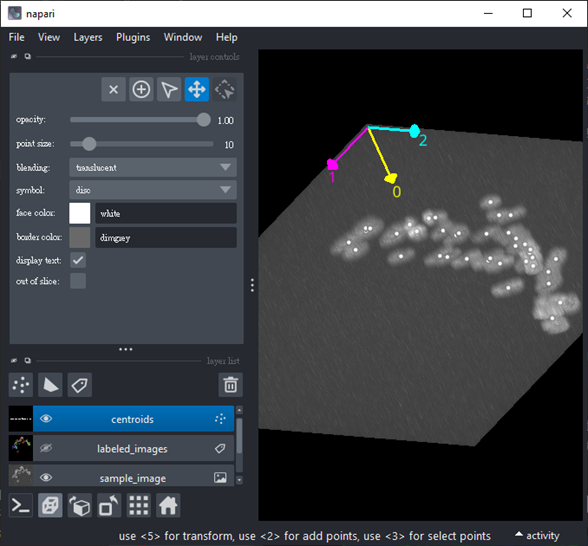

---

演習: ROIが二つの粒子で重なってしまった場合、位置に対応するように二つのセントロイドに修正する。修正後、ポイントレイヤーのコントロールパネルを探索し、ポイントの色を個々の粒子に対応させる（フレーム6以降に分裂したもの）。

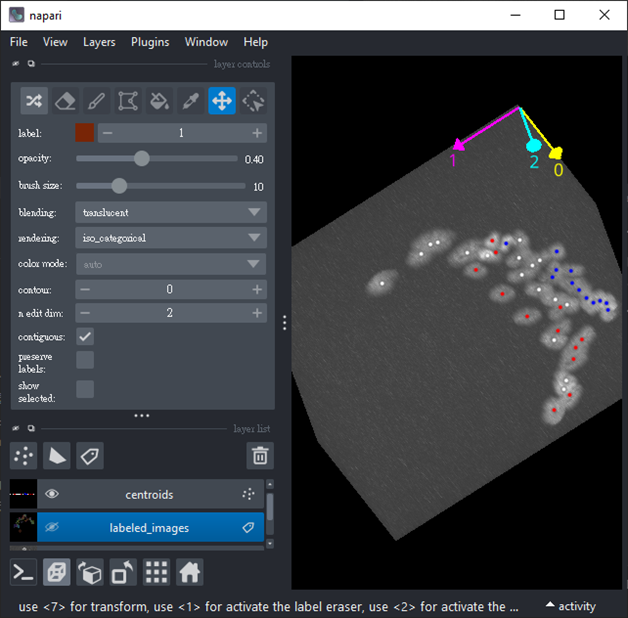

---

以下のスクリプトは、ポイントの色を抽出し、それをIDに変換する。

In [18]:
# ポイントとフェイスカラーを取得する
new_points = points_layer.data
points_face_color = points_layer.face_color

# ポイントフェイスカラー配列内のユニークな行を識別する
unique_colors = np.unique(points_face_color, axis=0)

# ポイントフェイスカラーをcolor_idに変更する
color_id = np.zeros(len(points_face_color), dtype=int)
for i, color in enumerate(unique_colors):
    color_id[(points_face_color == color).all(axis=1)] = i

# DataFrameにcolor_idを追加する
new_points_df = pd.DataFrame(new_points)
new_points_df['color_id'] = color_id

# Dim-0, 1, 2をt,y,xに名前を変える
new_points_df.columns = ['t', 'y', 'x', 'color_id']

# データフレームの最初の数行を表示する
new_points_df.head()


By now you might be wondering why in python the coordinates are arranged in z, y, x instead of x, y, z. This is because in python, the first dimension is the z axis, the second dimension is the y axis, and the third dimension is the x axis. This is the opposite of the convention used in image processing, where the first dimension is the y axis, the second dimension is the x axis, and the third dimension is the z axis. This is something to keep in mind when working with image data in python.

Napariの点群レイヤーの解説はこれで終了である。点群レイヤーでは、ポイントに「特徴」を追加するなど、他にもいくつかの操作が可能である（色を追加する方法に非常に似ている）。詳細については、Napariのドキュメントの点群レイヤーに関する部分を確認することを推奨する。

Napariのビューアはまだ閉じないでほしい。次のセクションでは、点群レイヤーを接続し、「トラック」レイヤーを導入する。

### Tracks Layer (トラックレイヤー)

以下では、先ほど作成した点を接続し、それをトラック(Tracks)に変換する。Napariでは、Tracks Layerへの入力データは、トラックIDとN個の点をD次元座標で含むNxD+1のNumPy配列またはリストでなければならない。Tracksデータ管理の詳細は後の章で説明するが、現時点では、2D + 時間のトラックの場合、データは次のように配置する必要があることを覚えておいてほしい。

```
   track_id    t    y    x
0         1  ...  ...  ...
1         1  ...  ...  ...
2         2  ...  ...  ...
```

3D + 時間のトラックの場合、データは次のように配置する。

```
   track_id    t    y    x    z
0         1  ...  ...  ...  ...
1         1  ...  ...  ...  ...
2         2  ...  ...  ...  ...
```

それでは、データを再編成してトラック形式に変換する。

In [21]:
# Track Dataframeを編成: new_points_dfのcolor_id列を最初の列に移動し、列名を'track_id'に変更
track_df = new_points_df[['color_id', 't', 'y', 'x']]
track_df.columns = ['track_id', 't', 'y', 'x']
track_df.head()

,track_id,x,y,z
0,3,0.0,346.431776,234.282243
1,3,1.0,264.918466,199.986338
2,3,2.0,247.146011,168.451975
3,3,3.0,237.254724,153.732558
4,3,4.0,254.974448,118.499655


In [24]:
# Track　Layerを追加
tracks = viewer.add_tracks(new_points_df, name='tracks')

# Trackレイヤーのスケールをイメージレイヤーと同じように調整する
viewer.layers['tracks'].scale = [15, 1, 1]

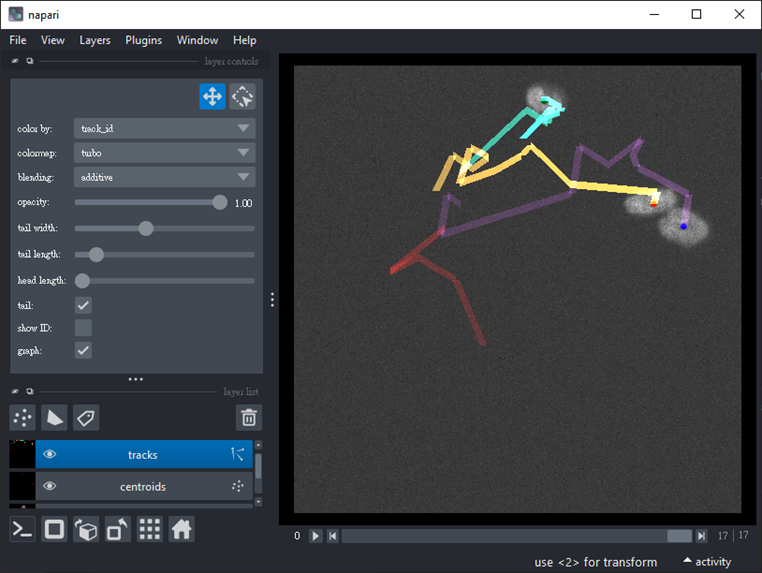



Tracksの分岐点(フレーム６)が接続されていないことに気づくだろう。これは、Trackデータの分岐前後でそれぞれを別々のトラックとして扱っているためである。

Tracksのgraph引数を使用して、tracks間の関係（例えば、合流や分岐）を定義することができる。graphはPython Dictionaryとして定義され、キーがtrack_id、値がそのtrackの"親"のtrack_idとなる。例えば、我々のケースでは、track3がtrack0、1、2に分岐する（track3がtrack0、1、2の親である）。詳細はtrack章で学ぶが、ここでは次のようにグラフを定義する：

In [26]:
graph = {
    0: [3],
    1: [3],
    2: [3],
}

Graphを`viewer.add_tracks`のインプットとして扱う。

In [29]:
# グラフをNapari　add_tracksに追加
connected_tracks = viewer.add_tracks(new_points_df, graph=graph, name='connected_tracks')
viewer.layers['connected_tracks'].scale = [15, 1, 1]

これでトラックが接続される:

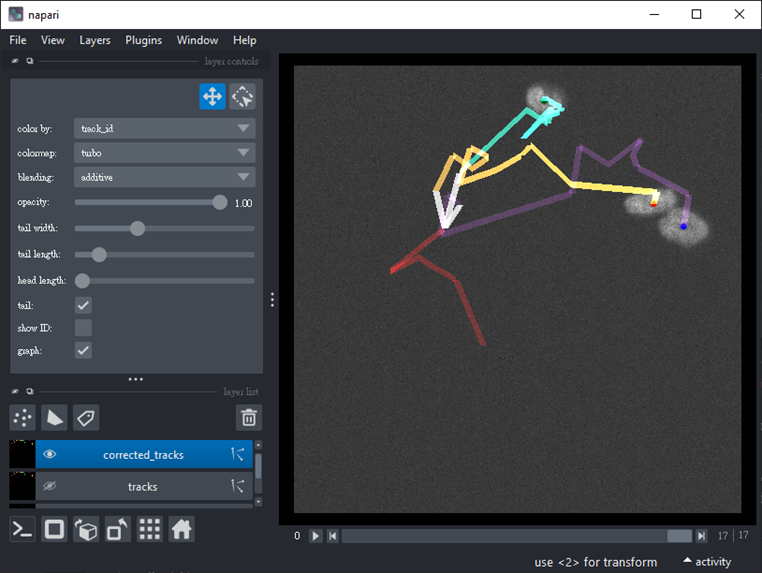

トラックを時間軸を3次元目の空間として可視化することも可能である:

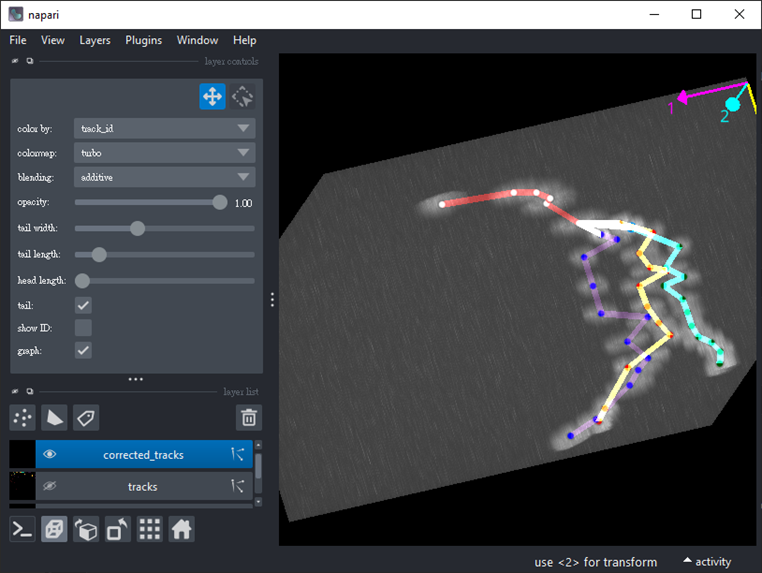

In [30]:
# Napariビューアを閉じる
viewer.close()

# トラックデータフレームを保存する
tracks_df.to_csv('tracks.csv', index=False)

これで、NapariのTracks Layerのウォークスルーは終了である。このセクションと前のセクションで、粒子追跡の例を通じてNapariのPoints LayerとTracks Layerについて学んだ。ご覧のとおり、手動でのトラッキングは非常に面倒である。2024年8月時点で、Napariコミュニティでは、手動でのトラックの注釈(Manual Track Annotation)を現状よりも容易にする方法を模索し始めており、今後の開発のアップデートに期待が持てる。また、多くの自動トラッキング方法が最近開発されており、後の章で紹介される。このセクションを通じて、その章を楽しみにしてほしい。次に、もう一つよく使われるNapariレイヤーであるShape Layerを紹介する。

### Adding Shapes Layer to Napari



このチュートリアルで最後に紹介するレイヤーとして、Shapes Layer（形レイヤー）について説明する。その名の通り、このレイヤータイプを使って形状を作成することができる。以下のコードを使用して形状を作成できる。

In [2]:
import napari
import numpy as np

# 三角形と長方形の頂点座標を定義
triangle = np.array([[10, 200], [50, 50], [200, 80]])
rectangle = np.array([[40, 40], [40, 80], [80, 80], [80, 40]])

# 三角形と長方形をnapariビューアにShapes Layerとして追加

viewer = napari.Viewer()

# 三角形を追加
triangle_layer = viewer.add_shapes([triangle], shape_type='polygon', edge_color='red', face_color='blue', name='triangle')
# 長方形を追加
rectangle_layer = viewer.add_shapes([rectangle], shape_type='polygon', edge_color='green', face_color='yellow', name='rectangle')

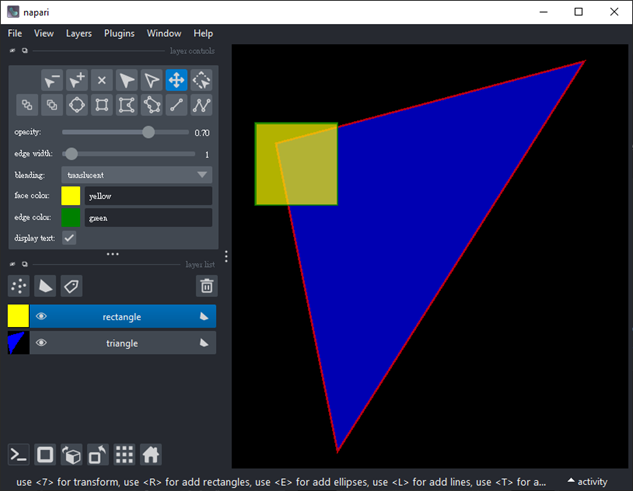

---


演習：Napariビューア内で形を作成できるか確認してください。これを行う方法については、Napariのドキュメントを参照してください。

---

NapariのShapes Layerでは、形を作成するだけでなく、パス (Path) オブジェクトも作成できる。これにより、手動でデータをトレースしたり、トレースデータを表示することが可能になる。例えば、形態分析における神経トレースや、後の章、実践編・型3 で説明される血管のトレース可視化にも利用できる。ここでは、実践編・型3で使用する血管画像を手動でトレーシングしてみよう。

https://bit.ly/jikken-igaku-kata　から、画像をダウンロードして、前セクションと同じようにノートブックと同じフォルダーに画像を移動しよう。

以下のコードを使用してその画像を読み込もう:

In [20]:
# BloodVessels_small.tif を読み込む
from skimage.io import imread
import napari

blood_vessels = imread('BloodVessels_small.tif')

# 画像を表示する
viewer = napari.Viewer()
blood_vessels_image = viewer.add_image(blood_vessels, name='blood_vessels')

---

演習: Napari ViewerでShapes Layerを作りPath機能で血管をなぞってみよう。

---

以下のような結果が得られます:

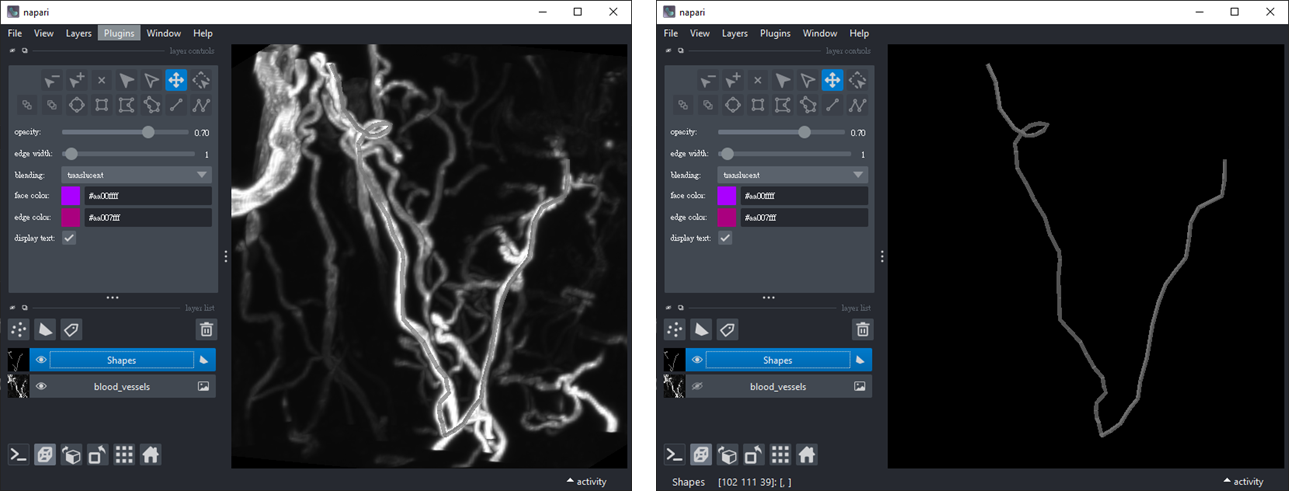

結果をJupyter環境に取り戻すには、次のコマンドを使用します:

In [7]:
# viewer.layers['blood_vessel_trace']からトレースデータを取得
trace_data = viewer.layers['blood_vessel_trace'].data
trace_data_np_array = np.array(trace_data)

# trace_data_np_arrayの形状を確認
print(f'trace_data_np_arrayの形状は: {trace_data_np_array.shape}')

# 次元のサイズが1のため、配列を「squeeze」します
trace_data_np_array_squeezed = np.squeeze(trace_data_np_array)

# trace_data_np_array_squeezedの形状を確認
print(f'trace_data_np_array_squeezedの形状は: {trace_data_np_array_squeezed.shape}')

import pandas as pd

# trace_data_np_array_squeezedからDataFrameを作成
trace_data_df = pd.DataFrame(trace_data_np_array_squeezed, columns=['z', 'y', 'x'])
trace_data_df.head()

# DataFrameをcsvファイルとして保存
trace_data_df.to_csv('trace_data.csv', index=False)

You might be curious why can we not annotate the tracks with the lines or path functionality in the shape layer. The fact is that it is still under development; Napari is a community project that people can contribute and share things that they would like to add to the functionality. If you are interested in help improving Napari, you can do too!

これまでに、NapariのImage Layer, Labels Layer, Points Layer, Track Layer, Shapes Layerについて紹介した。これらは私の意見では、Napariで最もよく使用されるレイヤーである。さらに、ベクターレイヤーとサーフェスレイヤーの2種類もあり、データの視覚化や操作に利用できる。興味がある方は、Napariの公式ウェブサイトで詳細を確認してほしい。

## Plugins in Napari

Just like Fiji-ImageJ, Napari also has a plugin system. In this section we will go through how to install a plugin in Napari. There are two ways to install a plugin in Napari, one is through the Napari plugin installer, which exists in the Napari viewer GUI; and the other is through the command line. Here we will go through both methods, installing napari-animation and napari-filament-annotator as examples.

### Installing a plugin through the Napari plugin manager

Open the Napari viewer and go to Plugins > Install/Uninstall Plugins. You will see a list of plugins that you can install. Search for the stardist-napari plugin and click the install button.

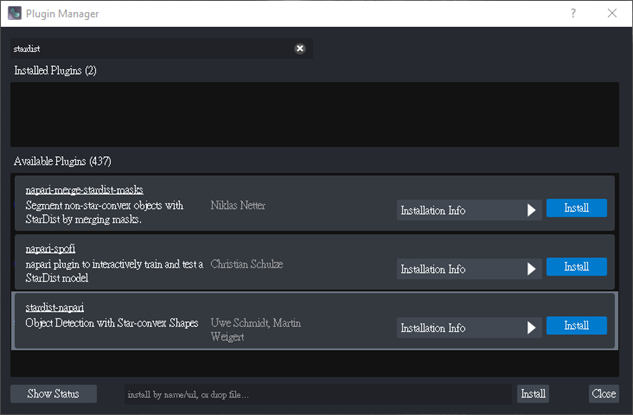

Once the installation is complete, restart Napari viewer. Let's load the image we used in the first section and try the stardist plugin:

In [9]:
from skimage.data import cells3d
import napari
import numpy as np

# Split the cells3d image into individual channels
cell3d_ch0 = cells3d()[:, 0, :, :]
cell3d_ch1 = cells3d()[:, 1, :, :]

# Do maximum projection to compress the 3D image into 2D
cell2d_ch0 = np.max(cell3d_ch0, axis=0)
cell2d_ch1 = np.max(cell3d_ch1, axis=0)

# Display the cells3d image in napari
viewer = napari.Viewer()
membrane = viewer.add_image(cell2d_ch0, name='membrane')
nuclei = viewer.add_image(cell2d_ch1, name='nuclei')

100%|██████████| 3.54k/3.54k [00:00<?, ?B/s]


Now go to Plugins > stardist-napari. You will see a following window:


Now change the Image Axis to ZYX, Model type to 3D and Pretrained Model to 3D_demo, and click `Run`. You will see the following result:

Then you can save the result with the previously mentioned code.

In [5]:
viewer.layers._ctx_keys

{'num_layers': 2}

In [8]:
# close the napari viewer
viewer.close()

RuntimeError: wrapped C/C++ object of type QtViewer has been deleted

### Installing a plugin through the command line

To install a plugin through the command line, you can check out the github repository of the plugin, or Napari hub (https://www.napari-hub.org/), where people share and install Napari plugins. Go to the Napari hub website and search for napari-plot-profile

### Introducing other useful plugins

There are a few Napari Plugins that I want to recommand. For general image analysis usage, I recommand napari-assistant (https://www.napari-hub.org/plugins/napari-assistant) which is useful for building a image analysis pipeline in a "click & try" way. If you are more used to the Fiji-ImageJ way of processing images, you will find it very useful. You can also install Napari-script-editor on top of it (https://www.napari-hub.org/plugins/napari-script-editor) that makes an equivalent function to the ImageJ script "recorder" - it will generate the Python code that correspond to what you clicked. 

Napari-filament-annotator(https://www.napari-hub.org/plugins/napari-filament-annotator) is another useful tool for annotating/ tracing filament data specifically. There are also multiple Deep Learning based segmentation/ denoising tools available as a Napari plugins, for example, cellpose-napari (https://www.napari-hub.org/plugins/cellpose-napari) and stardist-napari (https://www.napari-hub.org/plugins/stardist-napari), and napari n2v (https://www.napari-hub.org/plugins/napari-n2v). 

I would highly recommand you to test out some of these.

You can of couse develop your own plugins(https://napari.org/stable/plugins/index.html), and there is a guideline for it on the Napari website. But this would be for a more advanced users, so we will not cover it here.

## If you encounter any problems

Being a powerful software for multi-dimensional data visulization, Napari is still in its infancy, and there may be some bugs or issues that you encounter. If you encounter any problems, you can check the Napari documentation, or the Napari GitHub repository. You can also ask questions on the Napari GitHub repository, or on Image.sc. The Napari community is very active and helpful, so don't hesitate to ask for help if you need it. 

## おわりに

In this chapter, we covered the basics of Napari, including how to install Napari, how to start Napari from the command line and Jupyter notebook, and how to add different types of data to the Napari viewer. We also covered how to install a plugin in Napari. Napari is a powerful tool for multi-dimensional data visualization, and it provides a user-friendly interface for exploring and analyzing image data. In this chapter, I focused on how to label the data manually, and I hope it integrate well with the later chapters, where we will learn how to design and use an automatic workflow to perform analysis. I hope this chapter has given you a good introduction to Napari, and that you are now ready to start exploring your own data with Napari, or even better, to start contributing to the Napari community.

## TODO: Download vs code as an alternative to jupyter notebook
